In [1]:
# importing libraries
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
from my_package.mydefinitions import read_data, find_closest_value, eliminate_noisy_data, fit_gaussian_to_data

In [3]:
# path for the folder with /*.txt added at the end so that later txt files in this path will be listed
folder_path = r'c:\Users\User1\Desktop\Python UCL\Internship Photometric\Week 5\13_07_23\Pacto_PSF\Run_1/*.txt' 

# files in path
glob.glob(folder_path)

['c:\\Users\\User1\\Desktop\\Python UCL\\Internship Photometric\\Week 5\\13_07_23\\Pacto_PSF\\Run_1\\-100_deg.txt',
 'c:\\Users\\User1\\Desktop\\Python UCL\\Internship Photometric\\Week 5\\13_07_23\\Pacto_PSF\\Run_1\\-100_deg_v2.txt',
 'c:\\Users\\User1\\Desktop\\Python UCL\\Internship Photometric\\Week 5\\13_07_23\\Pacto_PSF\\Run_1\\-105_deg.txt',
 'c:\\Users\\User1\\Desktop\\Python UCL\\Internship Photometric\\Week 5\\13_07_23\\Pacto_PSF\\Run_1\\-10_deg.txt',
 'c:\\Users\\User1\\Desktop\\Python UCL\\Internship Photometric\\Week 5\\13_07_23\\Pacto_PSF\\Run_1\\-110_deg.txt',
 'c:\\Users\\User1\\Desktop\\Python UCL\\Internship Photometric\\Week 5\\13_07_23\\Pacto_PSF\\Run_1\\-115_deg.txt',
 'c:\\Users\\User1\\Desktop\\Python UCL\\Internship Photometric\\Week 5\\13_07_23\\Pacto_PSF\\Run_1\\-120_deg.txt',
 'c:\\Users\\User1\\Desktop\\Python UCL\\Internship Photometric\\Week 5\\13_07_23\\Pacto_PSF\\Run_1\\-125_deg.txt',
 'c:\\Users\\User1\\Desktop\\Python UCL\\Internship Photometric\\Week 

In [4]:
# import dark current data (it is common for all files)
file_1 = glob.glob(folder_path)[0]
dark_array = np.loadtxt(file_1, skiprows = 8, delimiter = ';', unpack = True)[2]

In [5]:
# Some strings common to all file names, they are removed from file path
part_to_remove1 = 'c:\\Users\\User1\\Desktop\\Python UCL\\Internship Photometric\\Week 5\\13_07_23\\Pacto_PSF\\Run_1\\'
part_to_remove2 = '_deg.txt'

# importing data in dataframe format
all_data_1 = read_data('_deg.txt', part_to_remove1, part_to_remove2, folder_path)

# convert Deg to micrometers
factor = 5 * 125 / 180

rounded_index = np.round(all_data_1.index.values * factor, 2)
all_data_1.index = rounded_index

all_data_1

c:\Users\User1\Desktop\Python UCL\Internship Photometric\Week 5\13_07_23\Pacto_PSF\Run_1\-100_deg.txt
-100.0
c:\Users\User1\Desktop\Python UCL\Internship Photometric\Week 5\13_07_23\Pacto_PSF\Run_1\-105_deg.txt
-105.0
c:\Users\User1\Desktop\Python UCL\Internship Photometric\Week 5\13_07_23\Pacto_PSF\Run_1\-10_deg.txt
-10.0
c:\Users\User1\Desktop\Python UCL\Internship Photometric\Week 5\13_07_23\Pacto_PSF\Run_1\-110_deg.txt
-110.0
c:\Users\User1\Desktop\Python UCL\Internship Photometric\Week 5\13_07_23\Pacto_PSF\Run_1\-115_deg.txt
-115.0
c:\Users\User1\Desktop\Python UCL\Internship Photometric\Week 5\13_07_23\Pacto_PSF\Run_1\-120_deg.txt
-120.0
c:\Users\User1\Desktop\Python UCL\Internship Photometric\Week 5\13_07_23\Pacto_PSF\Run_1\-125_deg.txt
-125.0
c:\Users\User1\Desktop\Python UCL\Internship Photometric\Week 5\13_07_23\Pacto_PSF\Run_1\-130_deg.txt
-130.0
c:\Users\User1\Desktop\Python UCL\Internship Photometric\Week 5\13_07_23\Pacto_PSF\Run_1\-135_deg.txt
-135.0
c:\Users\User1\Deskto

,192.98,193.28,193.58,193.87,194.17,194.47,194.77,195.07,195.37,195.67,...,761.25,761.50,761.76,762.01,762.26,762.51,762.77,763.02,763.27,763.52
-625.00,140.44101,118.87480,112.23141,97.00147,119.36173,144.06464,139.99413,107.02748,111.38449,106.89150,...,370.16167,349.29500,366.36167,364.96167,425.56167,435.62833,425.96167,375.89500,353.16167,330.795
-607.64,119.54932,102.59250,111.74801,93.38591,133.21823,167.97920,163.76478,116.06521,100.82928,114.34314,...,395.14333,365.07667,347.41000,360.54333,385.01000,444.14333,417.94333,390.01000,354.07667,307.210
-590.28,115.48593,115.34088,126.36168,98.86773,103.17348,122.65698,155.96263,141.79690,142.16983,115.55896,...,410.42167,376.42167,386.55500,350.95500,423.88833,438.55500,441.62167,380.02167,345.42167,317.155
-572.92,84.33810,87.40404,121.35688,129.06432,169.30970,174.71646,159.40974,121.97783,114.42568,127.15616,...,397.81500,388.48167,388.01500,364.88167,385.68167,393.41500,394.41500,367.54833,381.01500,354.215
-555.56,145.70312,154.24271,145.99473,99.16972,96.21911,145.08612,162.70488,140.33993,113.25971,116.72863,...,385.45167,369.71833,373.05167,338.71833,381.31833,435.85167,457.31833,402.05167,345.65167,298.485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319.44,125.96800,116.49377,116.27871,91.28501,110.64008,148.96442,147.49903,113.45522,96.49735,100.82806,...,380.05000,344.78333,327.58333,322.65000,368.25000,376.11667,399.58333,354.91667,361.25000,308.450
1336.81,151.11615,144.81118,145.06249,108.53577,100.62567,99.61429,106.41265,96.96895,115.41304,133.14564,...,400.16667,374.90000,369.96667,370.43333,408.63333,438.63333,400.96667,346.23333,320.50000,298.400
1354.17,153.19158,139.61934,133.07072,105.21060,123.70015,131.95599,134.82168,102.31130,103.68826,104.68709,...,368.90833,343.37500,361.84167,358.10833,395.17500,399.97500,395.44167,341.10833,328.84167,294.375
1371.53,124.50459,121.76848,140.95286,124.75976,123.58425,117.03752,96.50007,86.45647,91.43554,114.96975,...,354.52333,353.92333,384.65667,371.12333,402.85667,391.65667,381.65667,354.25667,345.45667,321.390


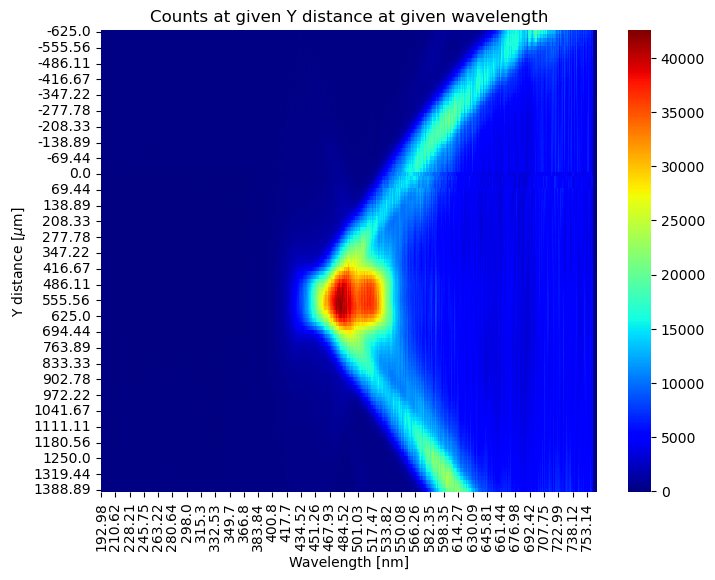

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(all_data_1, cmap='jet')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Y distance [$\mu$m]')
plt.title('Counts at given Y distance at given wavelength')
plt.show()

Text(0.5, 1.0, 'Counts at given wavelength vs Y distance')

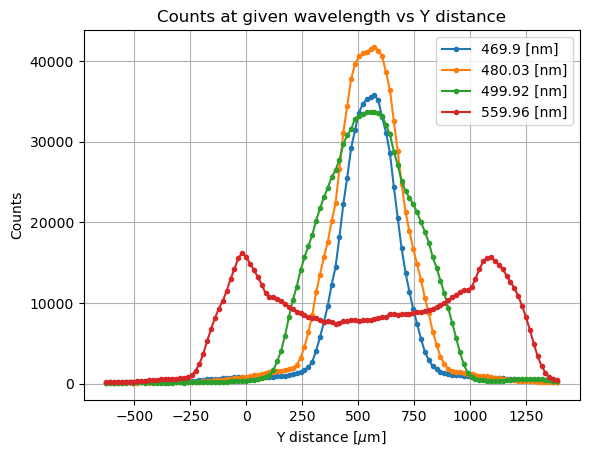

In [7]:
# As an example we can take a look at a few different spectra at different Y
plt.figure()

for wavelength in [470, 480, 500, 560]:

    wv_exact = find_closest_value(all_data_1.columns.values, wavelength)
    plt.plot(all_data_1[wv_exact],'.-', label = f'{wv_exact} [nm]')

plt.legend()
plt.grid()

plt.xlabel('Y distance [$\mu$m]')
plt.ylabel('Counts')
plt.title('Counts at given wavelength vs Y distance')

Text(0.5, 1.0, 'Spectra observed at differeny Y distances')

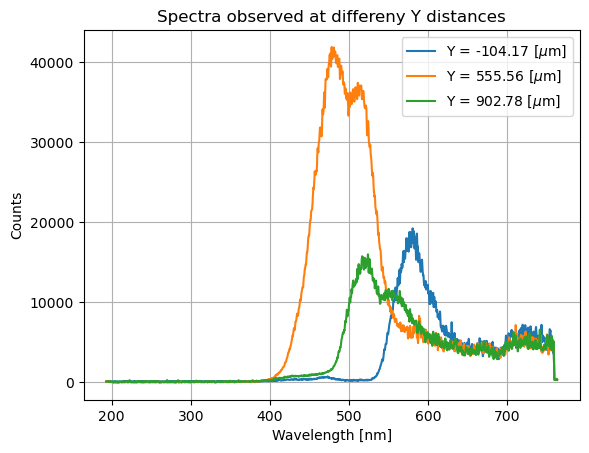

In [8]:
plt.figure()

for y_distance in [-100, 555, 900]:

    y_exact = find_closest_value(all_data_1.index.values, y_distance)
    plt.plot(all_data_1.loc[y_exact],'-', label = f'Y = {y_exact} [$\mu$m]')

plt.legend()
plt.grid()

plt.xlabel('Wavelength [nm]')
plt.ylabel('Counts')

plt.title('Spectra observed at differeny Y distances')

To check how reliable those spectra are, at few Y values spectra are retaken after first run is finished, then those retaken spectra are compared to their equivalents from the first run.

In [9]:
# Some strings common to all file names, they are removed from file path
part_to_remove1 = 'c:\\Users\\User1\\Desktop\\Python UCL\\Internship Photometric\\Week 5\\13_07_23\\Pacto_PSF\\Run_1\\'
part_to_remove2 = '_deg_v2.txt'

# importing data in dataframe format
all_data_2 = read_data('_deg_v2.txt', part_to_remove1, part_to_remove2, folder_path)

factor = 5 * 125 / 180

rounded_index = np.round(all_data_2.index.values * factor, 2)
all_data_2.index = rounded_index

all_data_2

c:\Users\User1\Desktop\Python UCL\Internship Photometric\Week 5\13_07_23\Pacto_PSF\Run_1\-100_deg_v2.txt
-100.0
c:\Users\User1\Desktop\Python UCL\Internship Photometric\Week 5\13_07_23\Pacto_PSF\Run_1\0_deg_v2.txt
0.0
c:\Users\User1\Desktop\Python UCL\Internship Photometric\Week 5\13_07_23\Pacto_PSF\Run_1\170_deg_v2.txt
170.0
c:\Users\User1\Desktop\Python UCL\Internship Photometric\Week 5\13_07_23\Pacto_PSF\Run_1\270_deg_v2.txt
270.0
c:\Users\User1\Desktop\Python UCL\Internship Photometric\Week 5\13_07_23\Pacto_PSF\Run_1\300_deg_v2.txt
300.0


,192.98,193.28,193.58,193.87,194.17,194.47,194.77,195.07,195.37,195.67,...,761.25,761.50,761.76,762.01,762.26,762.51,762.77,763.02,763.27,763.52
-347.22,138.93379,128.79351,134.35882,118.31954,137.50396,150.80815,151.88771,127.38451,118.88581,90.33871,...,385.83500,357.90167,351.76833,341.83500,379.63500,388.90167,390.16833,366.10167,356.36833,322.735
0.00,128.40715,120.04989,131.69560,113.37490,129.89218,147.83703,134.04832,105.87337,102.22001,105.72080,...,375.19167,343.85833,358.39167,366.05833,389.39167,397.85833,387.65833,376.32500,355.92500,309.225
590.28,115.18761,117.99835,124.74549,103.71091,117.93968,137.59823,125.62208,74.58486,77.38772,107.70919,...,415.21833,382.15167,367.88500,376.95167,399.08500,423.75167,419.35167,396.08500,366.28500,312.285
937.50,158.93702,139.25540,135.51179,109.11295,131.84465,149.87301,151.58682,105.67457,109.08607,114.52036,...,373.09000,351.69000,363.15667,366.89000,382.35667,381.22333,365.42333,350.55667,357.89000,342.690
1041.67,117.46237,116.11709,114.56530,85.10858,96.21360,131.17804,145.41339,132.30418,133.16808,129.38660,...,359.93167,326.33167,351.13167,377.46500,414.73167,436.73167,390.99833,369.06500,346.59833,339.365


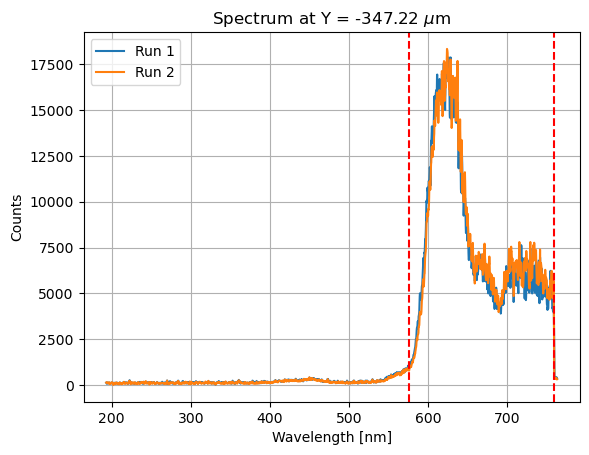

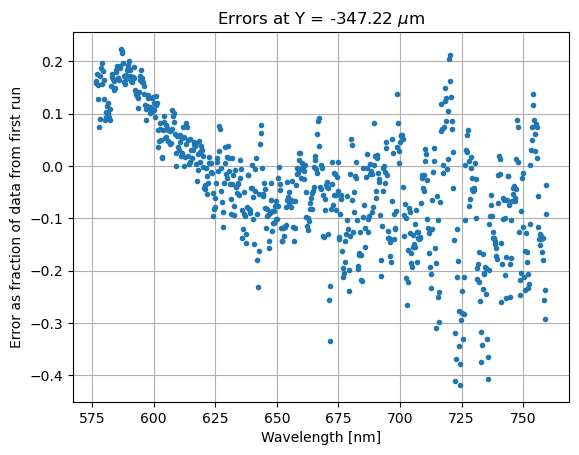

<Figure size 640x480 with 0 Axes>

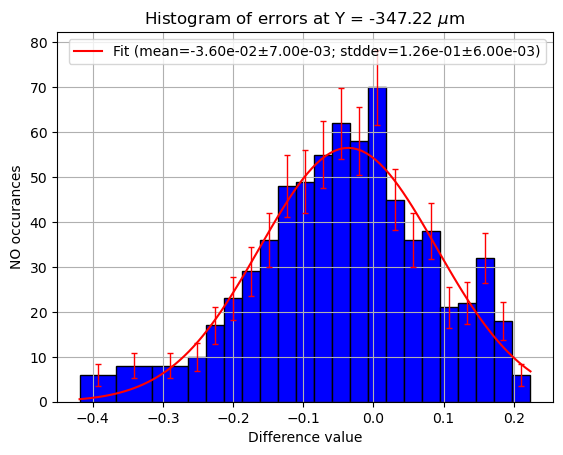

Lowest bin value is: 6.0


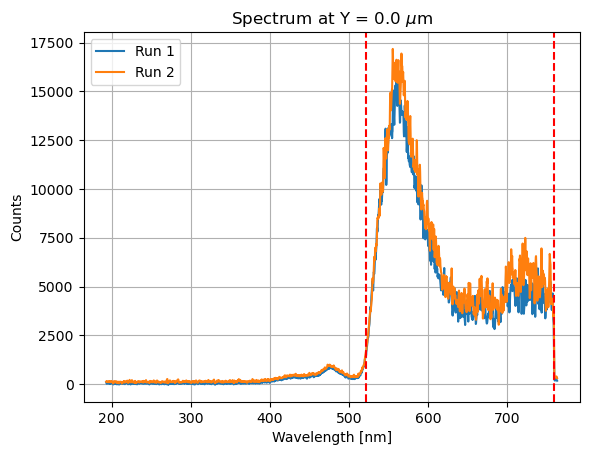

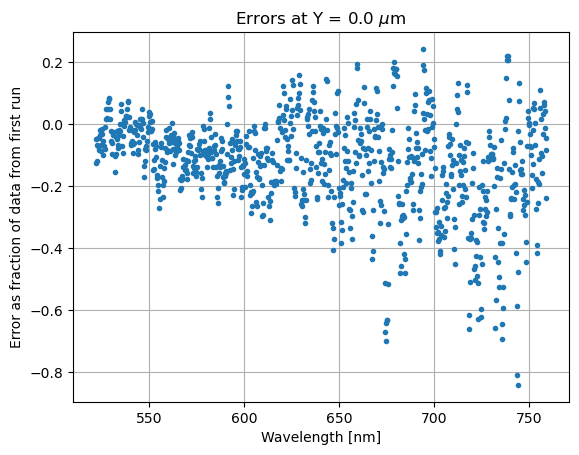

<Figure size 640x480 with 0 Axes>

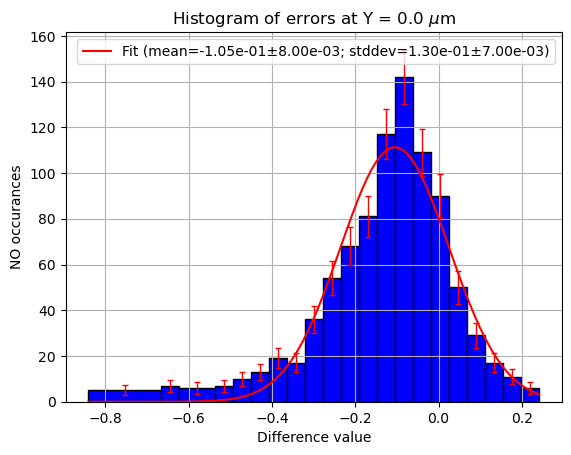

Lowest bin value is: 5.0


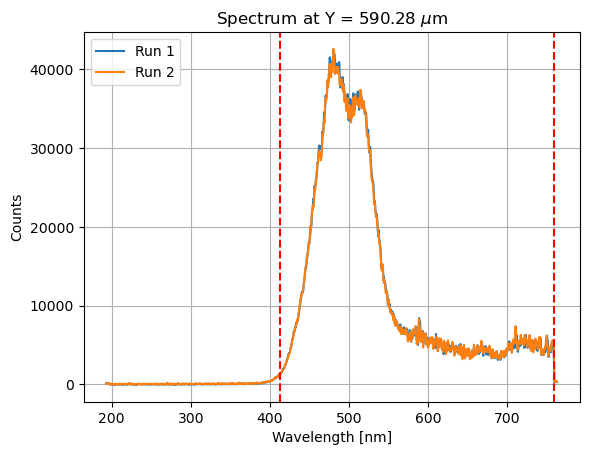

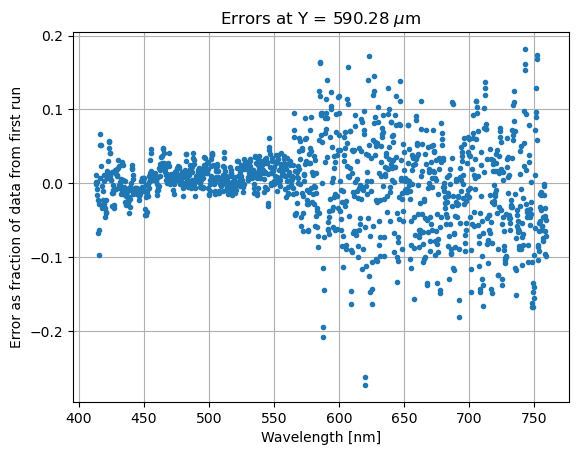

<Figure size 640x480 with 0 Axes>

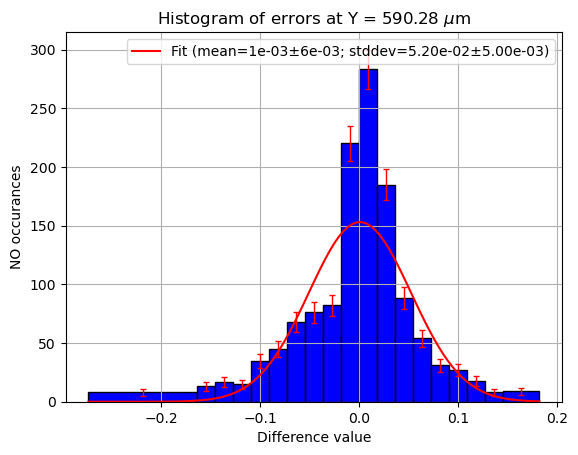

Lowest bin value is: 8.0


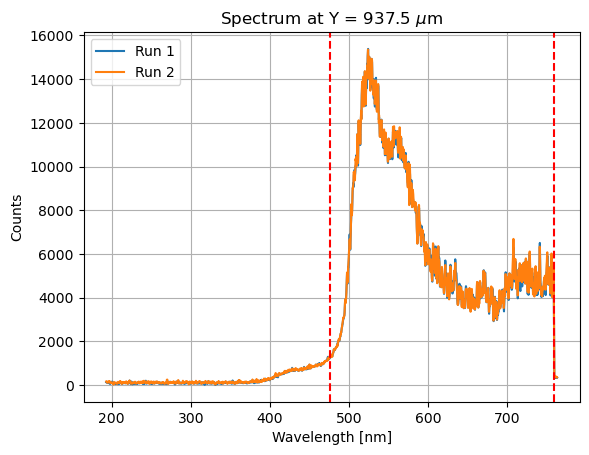

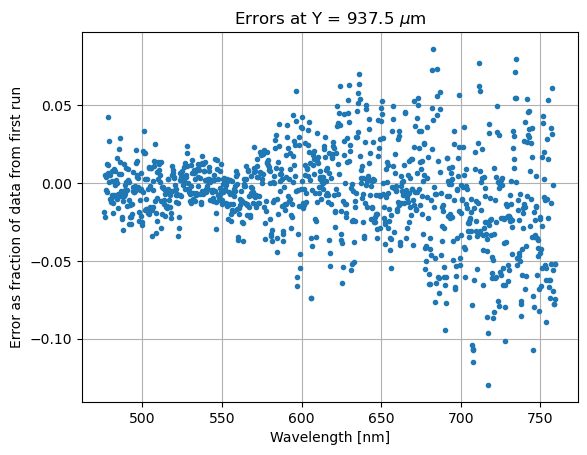

<Figure size 640x480 with 0 Axes>

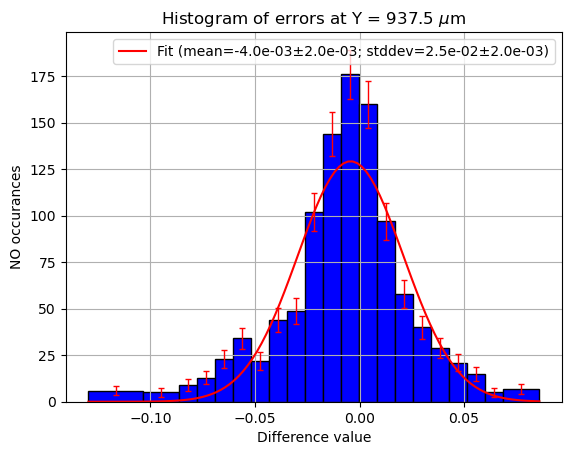

Lowest bin value is: 5.0


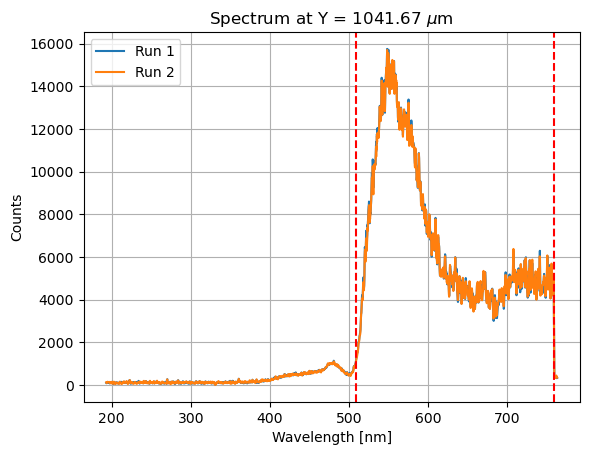

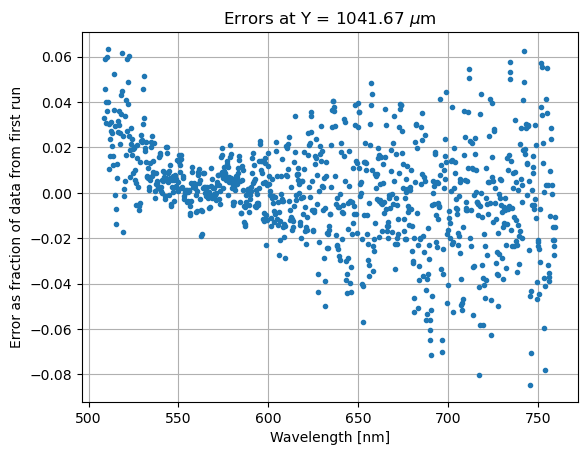

<Figure size 640x480 with 0 Axes>

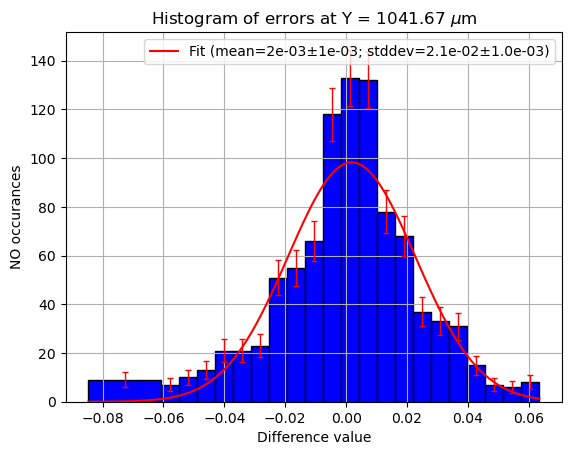

Lowest bin value is: 6.0


In [10]:
for index in all_data_2.index.values:
    clean_c_indeces = eliminate_noisy_data(all_data_1.loc[index], dark_array, SN_ratio_value= 0.5)

    clean_columns = all_data_1.columns.values[clean_c_indeces]

    plt.figure()

    plt.plot(all_data_1.loc[index], label= 'Run 1')
    plt.plot(all_data_2.loc[index], label= 'Run 2')

    plt.axvline(x=clean_columns[0], linestyle='--', color='red')  
    plt.axvline(x=clean_columns[-1], linestyle='--', color='red')

    plt.grid()
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Counts')
    plt.title(f'Spectrum at Y = {index} $\mu$m')
    plt.legend()

#################
    plt.figure()
    plt.plot( (all_data_1.loc[index][clean_columns] - all_data_2.loc[index][clean_columns]) / all_data_1.loc[index][clean_columns] , '.')

    plt.grid()
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Error as fraction of data from first run')
    plt.title(f'Errors at Y = {index} $\mu$m')

#################
    plt.figure()
    data = (all_data_1.loc[index][clean_columns] - all_data_2.loc[index][clean_columns]) / all_data_1.loc[index][clean_columns]

    params, perr = fit_gaussian_to_data(data, initial_guesses = [150,-0.01, 0.3], bin_number = 25, plot= True, maxfev= None,
    x_label= 'Difference value', y_label= 'NO occurances', title= f'Histogram of errors at Y = {index} $\mu$m', combine_bins= True, bin_number_correction = False)
